100%|██████████| 1000/1000 [00:23<00:00, 43.46it/s]


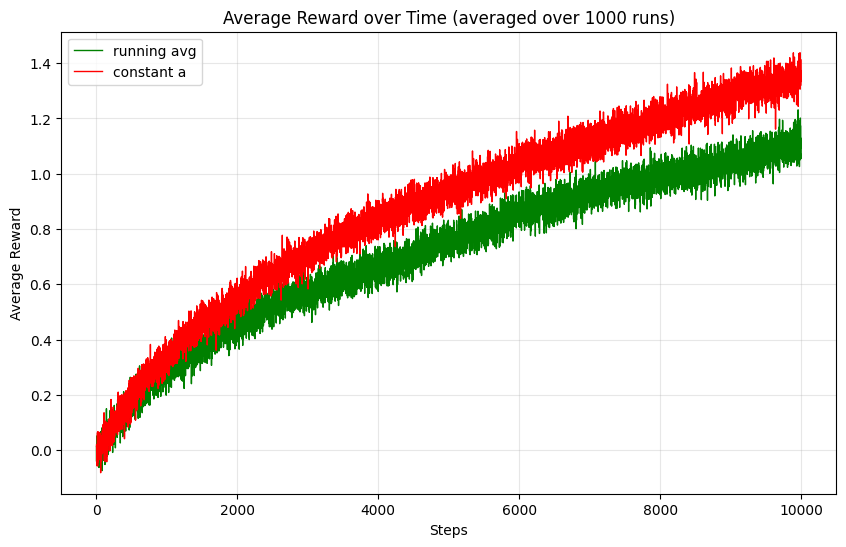

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

NUM_RUNS = 1000
NUM_STEPS = 10000
K = 10

def run_simulation(epsilon, alpha='avg'):
    
    true_action_values = np.zeros(K)
    rewards = []

    def sample_reward(index):
        return np.random.randn() + true_action_values[index]

    def choose_action(epsilon, estimated_action_values):
        if np.random.rand() < epsilon:
            return np.random.randint(K)
        else:
            return np.argmax(estimated_action_values)

    estimated_action_values = np.zeros(K)
    visit_counts = np.zeros(K)

    for i in range(NUM_STEPS):
        action = choose_action(epsilon, estimated_action_values)
        reward = sample_reward(action)
        visit_counts[action] += 1
        if alpha == 'avg':
            estimated_action_values[action] += (1 / visit_counts[action]) * (reward - estimated_action_values[action])
        else:
            estimated_action_values[action] += alpha * (reward - estimated_action_values[action])
        rewards.append(reward)

        av_increment = np.random.randn(K) * 0.01
        true_action_values += av_increment
    return rewards

def get_simulation_results(epsilon, alpha='avg'):
    all_rewards = []
    for i in tqdm(range(NUM_RUNS)):
        rewards = run_simulation(epsilon, alpha)
        all_rewards.append(rewards)
    
    all_rewards = np.array(all_rewards)
    average_reward_per_step = np.mean(all_rewards, axis=0)
    average_reward_over_last_1000 = np.mean(average_reward_per_step[-2000:])
    return average_reward_per_step, average_reward_over_last_1000

running_avg_results, running_avg_avg_over_last_2000 = get_simulation_results(0.1, 'avg')
constant_a_results, constant_a_avg_over_last_2000 = get_simulation_results(0.1, 0.1)

plt.figure(figsize=(10, 6))
plt.plot(range(1, NUM_STEPS + 1), running_avg_results, 'g-', linewidth=1, label='running avg')
plt.plot(range(1, NUM_STEPS + 1), constant_a_results, 'r-', linewidth=1, label='constant a')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time (averaged over ' + str(NUM_RUNS) + ' runs)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()